**Poojitha Konduparti**

## Final Portfolio Piece

## Conversational AI Bot 

We all love going to our homes and saying "Alexa, turn on the lights" or setting a reminder using Siri saying "Hey Siri! Set a reminder to pay my electricity bill" and many more things like that.

Building a Conversational Agent which is intended to converse with human beings using natural language. Some of the examples might include: Siri, Google Assistant, Alexa, etc.

In this article, we will be exploring different ways to build a chatbot using NLP


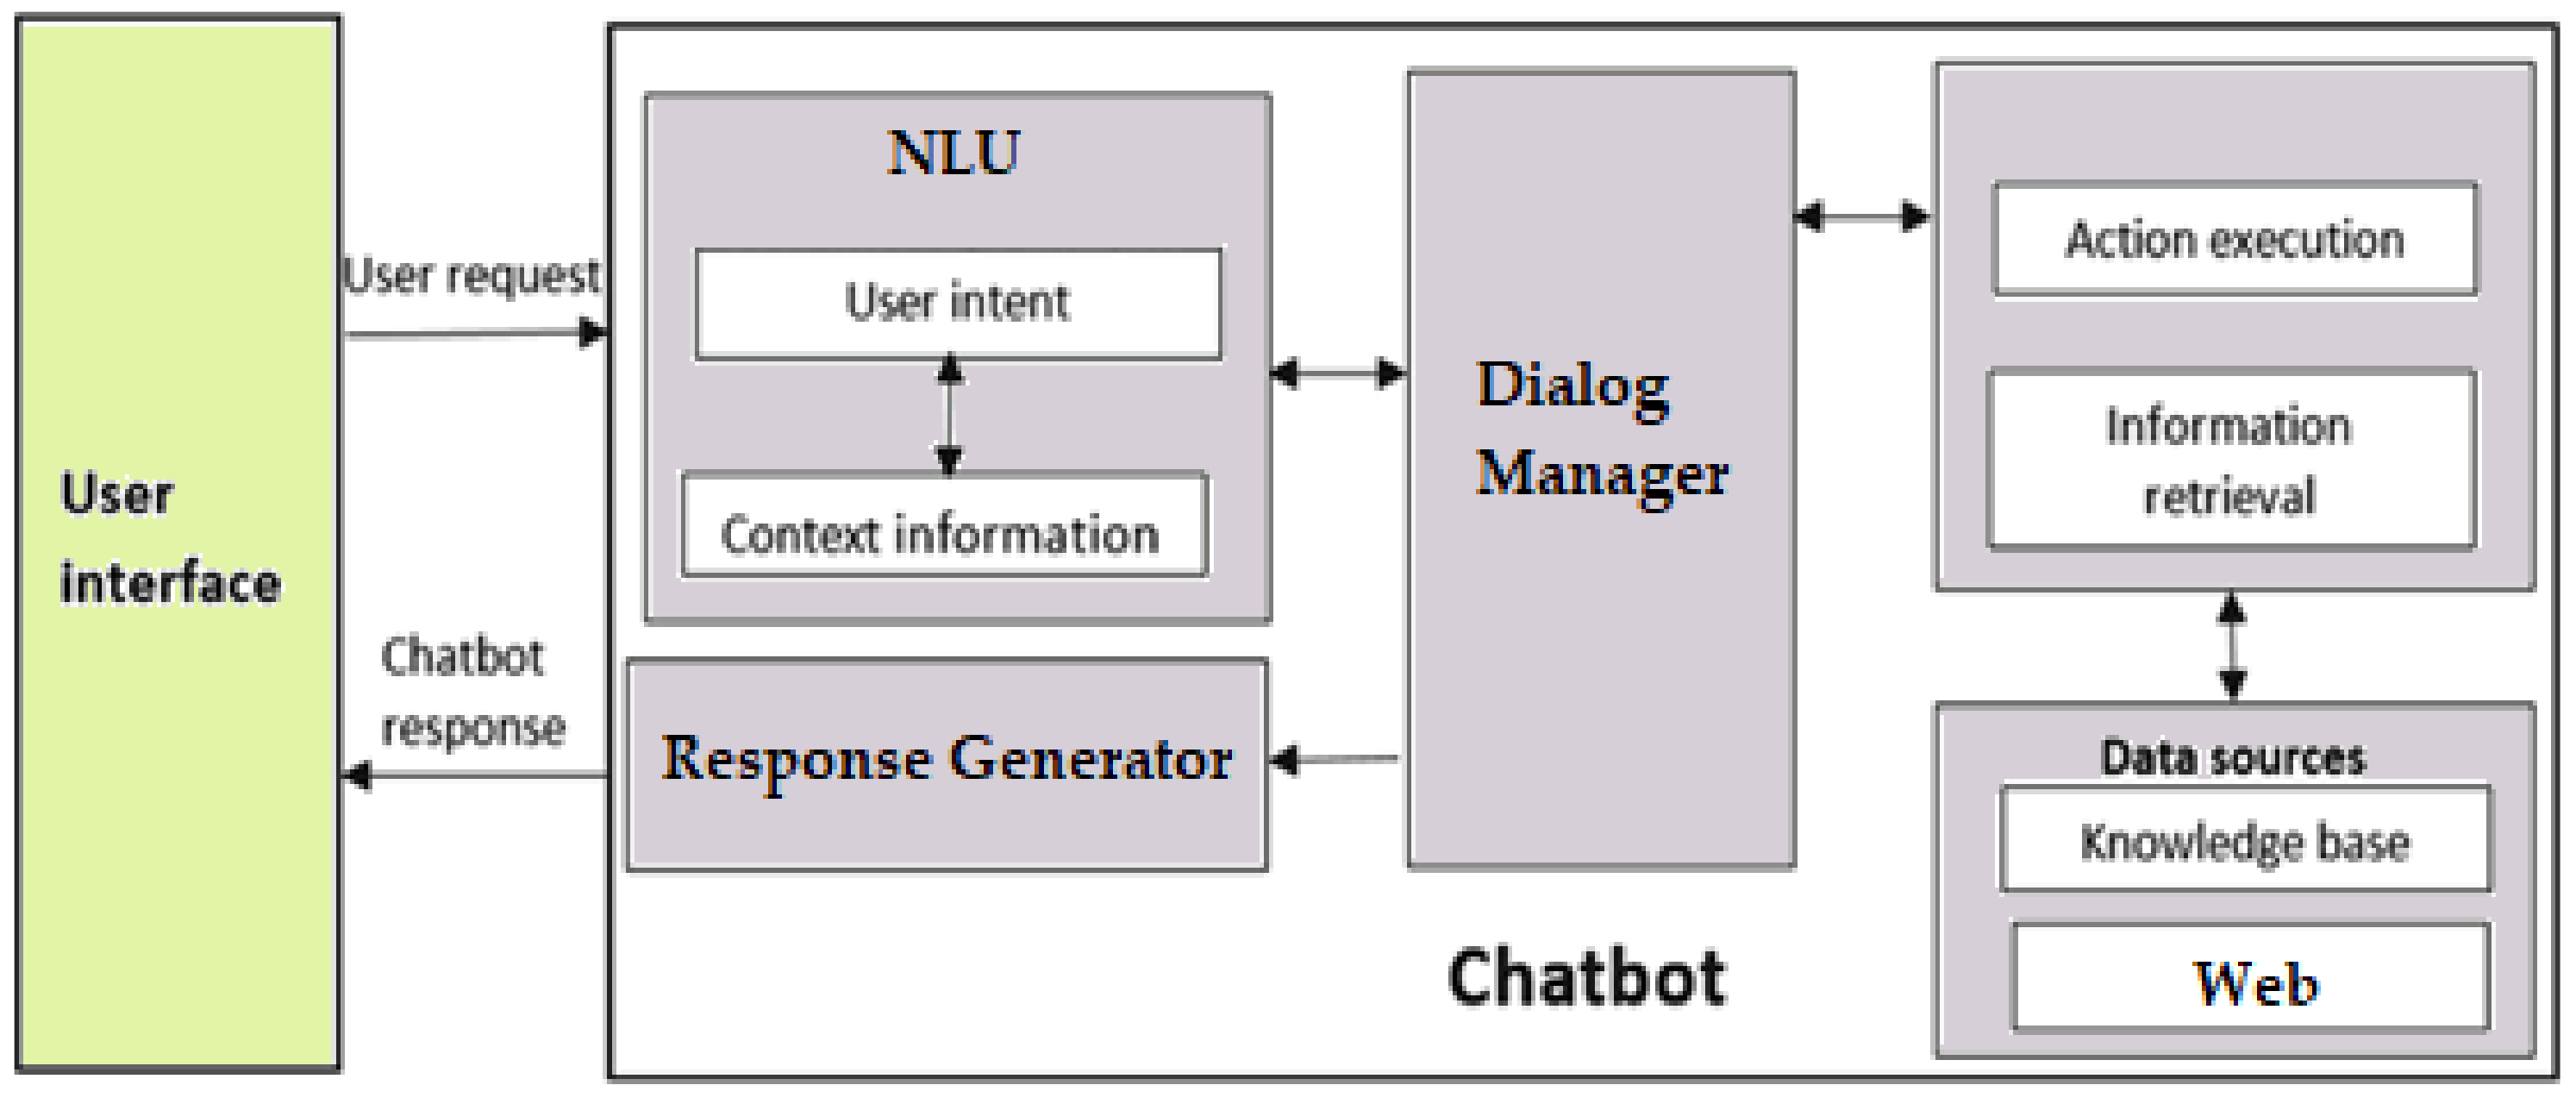

Chatbots can be categorized into two primary variants – Rule-Based and Self-learning.

The **Rule-based** approach trains a chatbot to answer questions based on a set of pre-determined rules on which it was initially trained. These set rules can either be very simple or very complex. While rule-based chatbots can handle simple queries quite well, they usually fail to process more complicated queries/requests.

As the name suggests, **self-learning** bots are chatbots that can learn on their own. These leverage advanced technologies like Artificial Intelligence and Machine Learning to train themselves from instances and behaviours. Naturally, these chatbots are much smarter than rule-based bots. Self-learning bots can be further divided into two categories – Retrieval Based or Generative.

##Approach 1

The first approach that we will be taking towards building a chatbot is to use simple tokenizers 

Our first step is to import the necessary libraries for our task

In [23]:
import json
import string
import random
import nltk
import numpy as num
from nltk.stem import WordNetLemmatizer # It has the ability to lemmatize.
import tensorflow as tensorF # A multidimensional array of elements is represented by this symbol.
from tensorflow.keras import Sequential # Sequential groups a linear stack of layers into a tf.keras.Model
from tensorflow.keras.layers import Dense, Dropout

nltk.download("punkt")# required package for tokenization
nltk.download("wordnet")# word database

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [29]:
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

This below is a sample JSON input with input patterns and their responses that our model can learn and build on in the future via training.

The user is required to assign a tag to categorize various possible interactions with the chatbot 

We can expand this document and modify the JSON file as per our requirement 

In [27]:
data = {"intents": [

             {"tag": "age",
              "patterns": ["how old are you?"],
              "responses": ["I am 2 years old and my birthday was yesterday"]
             },
              {"tag": "greeting",
              "patterns": [ "Hi", "Hello", "Hey"],
              "responses": ["Hi there", "Hello", "Hi :)"],
             },
              {"tag": "goodbye",
              "patterns": [ "bye", "later"],
              "responses": ["Bye", "take care"]
             },
             {"tag": "name",
              "patterns": ["what's your name?", "who are you?"],
              "responses": ["I have no name yet," "You can give me one, and I will appreciate it"]
             }

]}

##Processing the Data

here, vocabulary of all the terms used in the patterns, list of tag classes, list of all the patterns in the intents file will be created before creating our training data

In [30]:
lm = WordNetLemmatizer() #for getting words
# lists
ourClasses = []
newWords = []
documentX = []
documentY = []
# Each intent is tokenized into words and the patterns and their associated tags are added to their respective lists.
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        ournewTkns = nltk.word_tokenize(pattern)# tokenize the patterns
        newWords.extend(ournewTkns)# extends the tokens
        documentX.append(pattern)
        documentY.append(intent["tag"])


    if intent["tag"] not in ourClasses:# add unexisting tags to their respective classes
        ourClasses.append(intent["tag"])

newWords = [lm.lemmatize(word.lower()) for word in newWords if word not in string.punctuation] # set words to lowercase if not in punctuation
newWords = sorted(set(newWords))# sorting words
ourClasses = sorted(set(ourClasses))# sorting classes

Using Bag of words method to convert the values processed above into a format that neural networks can understand(numeric)

###What is the bag of words method?

It is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded.

By using the Bag-of-Words technique we can convert variable-length texts into a fixed-length vector.


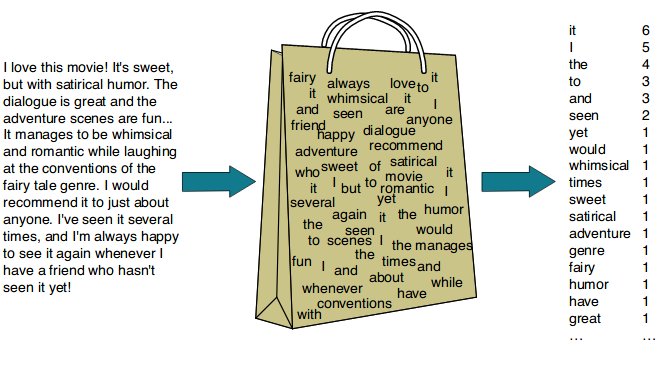

In [31]:
trainingData = [] # training list array
outEmpty = [0] * len(ourClasses)
# bow model
for idx, doc in enumerate(documentX):
    bagOfwords = []
    text = lm.lemmatize(doc.lower())
    for word in newWords:
        bagOfwords.append(1) if word in text else bagOfwords.append(0)

    outputRow = list(outEmpty)
    outputRow[ourClasses.index(documentY[idx])] = 1
    trainingData.append([bagOfwords, outputRow])

random.shuffle(trainingData)
trainingData = num.array(trainingData, dtype=object)# coverting our data into an array afterv shuffling

x = num.array(list(trainingData[:, 0]))# first trainig phase
y = num.array(list(trainingData[:, 1]))# second training phase

###Designing and Training the Neural Network

In [32]:
iShape = (len(x[0]),)
oShape = len(y[0])
# parameter definition
ourNewModel = Sequential()
# In the case of a simple stack of layers, a Sequential model is appropriate

# Dense function adds an output layer
ourNewModel.add(Dense(128, input_shape=iShape, activation="relu"))
# The activation function in a neural network is in charge of converting the node's summed weighted input into activation of the node or output for the input in question
ourNewModel.add(Dropout(0.5))
# Dropout is used to enhance visual perception of input neurons
ourNewModel.add(Dense(64, activation="relu"))
ourNewModel.add(Dropout(0.3))
ourNewModel.add(Dense(oShape, activation = "softmax"))
# below is a callable that returns the value to be used with no arguments
md = tensorF.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
# Below line improves the numerical stability and pushes the computation of the probability distribution into the categorical crossentropy loss function.
ourNewModel.compile(loss='categorical_crossentropy',
              optimizer=md,
              metrics=["accuracy"])
# Output the model in summary
print(ourNewModel.summary())
# Whilst training your Nural Network, you have the option of making the output verbose or simple.
ourNewModel.fit(x, y, epochs=200, verbose=1)
# By epochs, we mean the number of times you repeat a training set.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,436
Trainable params: 10,436
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================

Building utility functions

In [33]:
def ourText(text):
  newtkns = nltk.word_tokenize(text)
  newtkns = [lm.lemmatize(word) for word in newtkns]
  return newtkns

def wordBag(text, vocab):
  newtkns = ourText(text)
  bagOwords = [0] * len(vocab)
  for w in newtkns:
    for idx, word in enumerate(vocab):
      if word == w:
        bagOwords[idx] = 1
  return num.array(bagOwords)

def Pclass(text, vocab, labels):
  bagOwords = wordBag(text, vocab)
  ourResult = ourNewModel.predict(num.array([bagOwords]))[0]
  newThresh = 0.2
  yp = [[idx, res] for idx, res in enumerate(ourResult) if res > newThresh]

  yp.sort(key=lambda x: x[1], reverse=True)
  newList = []
  for r in yp:
    newList.append(labels[r[0]])
  return newList

def getRes(firstlist, fJson):
  tag = firstlist[0]
  listOfIntents = fJson["intents"]
  for i in listOfIntents:
    if i["tag"] == tag:
      ourResult = random.choice(i["responses"])
      break
  return ourResult

The user will be able to enter a query in a while loop, which will then be cleaned.

In [35]:
while True:
    newMessage = input("")
    intents = Pclass(newMessage, newWords, ourClasses)
    ourResult = getRes(intents, data)
    print(ourResult)

hi!
1/1 [==============================] - 0s 14ms/step
Hi there
what's up?
1/1 [==============================] - 0s 14ms/step
I have no name yet,You can give me one, and I will appreciate it
I would like your name to be ziggy
1/1 [==============================] - 0s 14ms/step
I have no name yet,You can give me one, and I will appreciate it
hi ziggy
1/1 [==============================] - 0s 15ms/step
Hi :)
what's your name?
1/1 [==============================] - 0s 14ms/step
I have no name yet,You can give me one, and I will appreciate it
bye
1/1 [==============================] - 0s 15ms/step
Bye

1/1 [==============================] - 0s 17ms/step
Hello

1/1 [==============================] - 0s 16ms/step
Hello

1/1 [==============================] - 0s 17ms/step
Hi :)


KeyboardInterrupt: ignored

##Approach 2

We use HuggingFace Transformers in this approach to build our chatbot

**What are Hugging Face Transformers?**

The Hugging Face transformers are a set of open-source natural language processing (NLP) models that can be used for a variety of tasks, such as language translation, text summarization, and text generation. They are based on the Transformer architecture, which was introduced in a paper by researchers at Google in 2017. This architecture uses self-attention mechanisms to process input text, allowing the model to capture long-range dependencies and learn contextual relationships between words in a sentence.


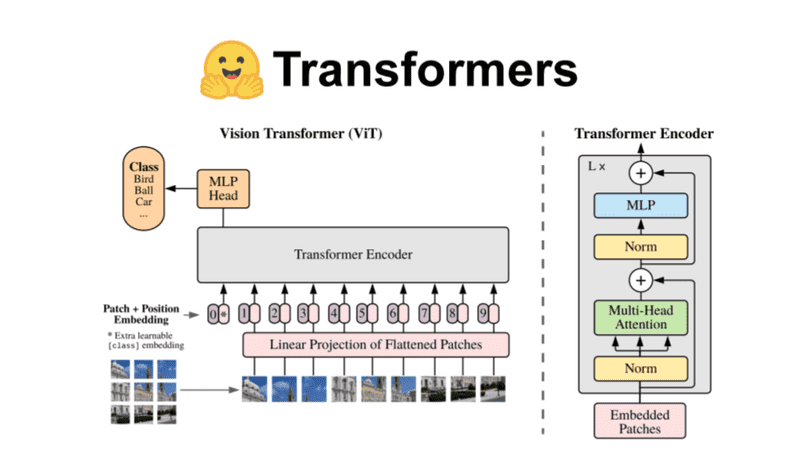




In [1]:
!pip -q install transformers


     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 7.6 MB 27.2 MB/s 
     |████████████████████████████████| 182 kB 51.8 MB/s 


Importing the necessary libraries


In [2]:
import glob
import logging
import os
import pickle
import random
import re
import shutil
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from torch.utils.data.distributed import DistributedSampler
from tqdm.notebook import tqdm, trange

from pathlib import Path

from transformers import (
    MODEL_WITH_LM_HEAD_MAPPING,
    WEIGHTS_NAME,
    AdamW,
    AutoConfig,
    PreTrainedModel,
    PreTrainedTokenizer,
    get_linear_schedule_with_warmup,
)


try:
    from torch.utils.tensorboard import SummaryWriter
except ImportError:
    from tensorboardX import SummaryWriter

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Loading the Dataset

We are using the Rick and Morty Dataset from kaggle

In [5]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/RickAndMorty/RickAndMortyScripts.csv')


Visualizing the Dataset

In [6]:
data.sample(6)


,index,season no.,episode no.,episode name,name,line
1862,2403,3,7,Tales From the Citadel,Cop Morty,"Not so big now, are ya?"
990,1209,2,5,Get Schwifty,Principal Vagina,HEEEEELLLLPPPP!!!!!
422,486,1,2,Lawnmower Dog,Jerry,I can't believe how mean snuffles got just bec...
388,442,1,2,Lawnmower Dog,Morty,"Wow, you know what? I mean, it looks like we c..."
345,392,1,2,Lawnmower Dog,Scary Terry,"I'm scary Terry. You can run, but you can't hi..."
889,1097,2,5,Get Schwifty,President,"Ah, shit."


In [7]:
CHARACTER_NAME = 'Rick'


In [8]:
contexted = []

# context window of size 7
n = 7

for i in data[data.name == CHARACTER_NAME].index:
  if i < n:
    continue
  row = []
  prev = i - 1 - n # we additionally substract 1, so row will contain current responce and 7 previous responces  
  for j in range(i, prev, -1):
    row.append(data.line[j])
  contexted.append(row)

columns = ['response', 'context'] 
columns = columns + ['context/' + str(i) for i in range(n - 1)]

df = pd.DataFrame.from_records(contexted, columns=columns)

In [9]:
df.sample(6)


,response,context,context/0,context/1,context/2,context/3,context/4,context/5
268,"Yeah, I'd like to get a 10-piece McNugget and ...",To the day it all began and ended. The moment ...,Where are we going?,"Oh, God! Oh, God! Whoa, whoa!","What?! No, I'm not right. I-I was using ghouli...",You're right!,He bails on everybody! He bailed on Mom when s...,Because you suck! You've been keeping your lip...
328,"Great. Next time I need a species sterilized, ...",Then why aren't we killing them?!,"Don't let any of those things get away, Morty....","That, Morty, is why you don't go to therapy.","Who? Who was that, Rick?",Jaguar!,"Oh, geez, Rick, I-I-I don't want to die!","This is it, Morty. We're goners. We're not get..."
42,"It's as good as garbage, Morty. It's not gonna...",What?!,"There's just one problem, Morty one little han...","Wow, that's pretty crazy, Rick.","Not that you asked, Morty, but what just happe...","Sure thing, Rick.","Don't worry about it, Morty. Just come help me...","Ooh, Ohh, Ooh. Wow, Rick. That stuff just heal..."
249,"Oh man, I'm trying to remember Morty.","Rick, who-who is Jan-Michael Vincent?",And sixteen quadrants. There's only enough tim...,"In a world, where there are eight Jan-Michael ...",Just stay away from the coffee machine.,Is that something we should be concerned about?,"Oh, man Morty. How DID she get there?",Whoa! Look! It's that lady with all that shit ...
68,"Morty, t-tell your parents the square root of pi.","Aw, geez, dad. Y-you know, that's a lot to dro...","Well, duh doy, son. Look, I love you, Morty, b...",I do?,"Oh, for crying out—he's got some kind of disab...",I-I-I don't know what you mean by that. Can ca...,"Oh, don't high-road us, dad. You know fully we...",What are you trying to say about Morty? That h...
205,Take a shit on the floor Time to get schwifty ...,"Don’t analyze it, Nathan. It’s working!",Mr. Bulldops?,Take off your pants and your panties Shit on t...,"It’s our world’s best effort, that’s what.",Get… schwifty? What the hell is that?,Ahhhhh yeahhhhh Ya gotta get schwifty Ya gott...,"Oh man, ok, all right, um…"


In [10]:
trn_df, val_df = train_test_split(df, test_size=0.1)
trn_df.head()

,response,context,context/0,context/1,context/2,context/3,context/4,context/5
160,"Alright, listen, you two, we froze time for a ...",Who cares about the thing you guys are talkin...,A competent one.,What? What kind of monster are you?,"You have dropped so many balls, man. Do you ev...",It's not my fault we froze time on a humid day!,Then you've been doing it wrong for six months...,"I know how to vacuum Mom and Dad, Summer, I've..."
242,"Yeah me neither, we pretty much nailed it the ...",A sequel.,Fine! Excuse me. Coming through. What are you...,"Go in the waiting room, Dad.",What? Every hospital claims to have the best d...,Is he going to die?,"Alright fine, but you're not touching my CRISPR.",You're overreacting!
140,"No, no, that happened before you went to sleep...","Aw, man. I really liked this life. Well, at le...",It's been six hours. Dreams move one one-hundr...,But I-it's been like a whole year!,"It's a dream, Morty. We're in your dog's dream...",What?,"No, no, no, I was just playing dead. Good news...","Mmm. Thank you, Fido. Rick! I thought you were..."
170,Whoa whoa wh-what the hell hell hell hell hell?,You shut up!,What's yours?,You didn't what?,I didn't!,You shut up you big... female asshole!,"Shut up Morty, you vindictive little turd!",Boom! In your face Summer! You really dropped ...
172,"Huh, what do you know, it's working","Whatever you're asking, the answer is I'm amaz...","Alright, since this time crystal exists in bot...",We “isn't”,Or?,Or...,"Look, there's no time to hold me accountable, ...",And you did it so you could clean the house af...


Formatting the data and defining some helper functions
We need to construct the data in the right format so the bot can interpret it properly. To do this we're adding special characters like the 'end of string' charater

In [11]:
# create dataset suitable for our model
def construct_conv(row, tokenizer, eos = True):
    flatten = lambda l: [item for sublist in l for item in sublist]
    conv = list(reversed([tokenizer.encode(x) + [tokenizer.eos_token_id] for x in row]))
    conv = flatten(conv)
    return conv

class ConversationDataset(Dataset):
    def __init__(self, tokenizer: PreTrainedTokenizer, args, df, block_size=512):

        block_size = block_size - (tokenizer.model_max_length - tokenizer.max_len_single_sentence)

        directory = args.cache_dir
        cached_features_file = os.path.join(
            directory, args.model_type + "_cached_lm_" + str(block_size)
        )

        if os.path.exists(cached_features_file) and not args.overwrite_cache:
            logger.info("Loading features from cached file %s", cached_features_file)
            with open(cached_features_file, "rb") as handle:
                self.examples = pickle.load(handle)
        else:
            logger.info("Creating features from dataset file at %s", directory)

            self.examples = []
            for _, row in df.iterrows():
                conv = construct_conv(row, tokenizer)
                self.examples.append(conv)

            logger.info("Saving features into cached file %s", cached_features_file)
            with open(cached_features_file, "wb") as handle:
                pickle.dump(self.examples, handle, protocol=pickle.HIGHEST_PROTOCOL)

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, item):
        return torch.tensor(self.examples[item], dtype=torch.long)

In [12]:
# Cacheing and storing of data/checkpoints

def load_and_cache_examples(args, tokenizer, df_trn, df_val, evaluate=False):
    return ConversationDataset(tokenizer, args, df_val if evaluate else df_trn)


def set_seed(args):
    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    if args.n_gpu > 0:
        torch.cuda.manual_seed_all(args.seed)


def _sorted_checkpoints(args, checkpoint_prefix="checkpoint", use_mtime=False) -> List[str]:
    ordering_and_checkpoint_path = []

    glob_checkpoints = glob.glob(os.path.join(args.output_dir, "{}-*".format(checkpoint_prefix)))

    for path in glob_checkpoints:
        if use_mtime:
            ordering_and_checkpoint_path.append((os.path.getmtime(path), path))
        else:
            regex_match = re.match(".*{}-([0-9]+)".format(checkpoint_prefix), path)
            if regex_match and regex_match.groups():
                ordering_and_checkpoint_path.append((int(regex_match.groups()[0]), path))

    checkpoints_sorted = sorted(ordering_and_checkpoint_path)
    checkpoints_sorted = [checkpoint[1] for checkpoint in checkpoints_sorted]
    return checkpoints_sorted


def _rotate_checkpoints(args, checkpoint_prefix="checkpoint", use_mtime=False) -> None:
    if not args.save_total_limit:
        return
    if args.save_total_limit <= 0:
        return

    # Check if we should delete older checkpoint(s)
    checkpoints_sorted = _sorted_checkpoints(args, checkpoint_prefix, use_mtime)
    if len(checkpoints_sorted) <= args.save_total_limit:
        return

    number_of_checkpoints_to_delete = max(0, len(checkpoints_sorted) - args.save_total_limit)
    checkpoints_to_be_deleted = checkpoints_sorted[:number_of_checkpoints_to_delete]
    for checkpoint in checkpoints_to_be_deleted:
        logger.info("Deleting older checkpoint [{}] due to args.save_total_limit".format(checkpoint))
        shutil.rmtree(checkpoint)

##Building the Model


In [13]:
from transformers import AutoModelWithLMHead, AutoModelForCausalLM, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = AutoModelWithLMHead.from_pretrained("microsoft/DialoGPT-small")

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/641 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1132: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Downloading:   0%|          | 0.00/351M [00:00<?, ?B/s]

In [14]:
"""
Fine-tuning the library models for language modeling on a text file (GPT, GPT-2, BERT, RoBERTa).
GPT and GPT-2 are fine-tuned using a causal language modeling (CLM) loss while BERT and RoBERTa are fine-tuned
using a masked language modeling (MLM) loss.
"""

# Configs
logger = logging.getLogger(__name__)

MODEL_CONFIG_CLASSES = list(MODEL_WITH_LM_HEAD_MAPPING.keys())
MODEL_TYPES = tuple(conf.model_type for conf in MODEL_CONFIG_CLASSES)

In [15]:
#Args to allow for easy convertion of python script to notebook
class Args():
    def __init__(self):
        self.output_dir = '/content/output-small'
        self.model_type = 'gpt2'
        self.model_name_or_path = 'microsoft/DialoGPT-small'
        self.config_name = 'microsoft/DialoGPT-small'
        self.tokenizer_name = 'microsoft/DialoGPT-small'
        self.cache_dir = 'cached'
        self.block_size = 512
        self.do_train = True
        self.do_eval = True
        self.evaluate_during_training = False
        self.per_gpu_train_batch_size = 4
        self.per_gpu_eval_batch_size = 4
        self.gradient_accumulation_steps = 1
        self.learning_rate = 5e-5
        self.weight_decay = 0.0
        self.adam_epsilon = 1e-8
        self.max_grad_norm = 1.0
        self.num_train_epochs = 4
        self.max_steps = -1
        self.warmup_steps = 0
        self.logging_steps = 1000
        self.save_steps = 3500
        self.save_total_limit = None
        self.eval_all_checkpoints = False
        self.no_cuda = False
        self.overwrite_output_dir = True
        self.overwrite_cache = True
        self.should_continue = False
        self.seed = 42
        self.local_rank = -1
        self.fp16 = False
        self.fp16_opt_level = 'O1'

args = Args()


##Training and Evaluating the Model

In [16]:
def train(args, train_dataset, model: PreTrainedModel, tokenizer: PreTrainedTokenizer) -> Tuple[int, float]:
    """ Train the model """
    if args.local_rank in [-1, 0]:
        tb_writer = SummaryWriter()

    args.train_batch_size = args.per_gpu_train_batch_size * max(1, args.n_gpu)

    def collate(examples: List[torch.Tensor]):
        if tokenizer._pad_token is None:
            return pad_sequence(examples, batch_first=True)
        return pad_sequence(examples, batch_first=True, padding_value=tokenizer.pad_token_id)

    train_sampler = RandomSampler(train_dataset) if args.local_rank == -1 else DistributedSampler(train_dataset)
    train_dataloader = DataLoader(
        train_dataset, sampler=train_sampler, batch_size=args.train_batch_size, collate_fn=collate, drop_last = True
    )

    if args.max_steps > 0:
        t_total = args.max_steps
        args.num_train_epochs = args.max_steps // (len(train_dataloader) // args.gradient_accumulation_steps) + 1
    else:
        t_total = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs

    model = model.module if hasattr(model, "module") else model  # Take care of distributed/parallel training
    model.resize_token_embeddings(len(tokenizer))
    # add_special_tokens_(model, tokenizer)


    # Prepare optimizer and schedule (linear warmup and decay)
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": args.weight_decay,
        },
        {"params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], "weight_decay": 0.0},
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate, eps=args.adam_epsilon)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=args.warmup_steps, num_training_steps=t_total
    )

    # Check if saved optimizer or scheduler states exist
    if (
        args.model_name_or_path
        and os.path.isfile(os.path.join(args.model_name_or_path, "optimizer.pt"))
        and os.path.isfile(os.path.join(args.model_name_or_path, "scheduler.pt"))
    ):
        # Load in optimizer and scheduler states
        optimizer.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "optimizer.pt")))
        scheduler.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "scheduler.pt")))

    if args.fp16:
        try:
            from apex import amp
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use fp16 training.")
        model, optimizer = amp.initialize(model, optimizer, opt_level=args.fp16_opt_level)

    # multi-gpu training (should be after apex fp16 initialization)
    if args.n_gpu > 1:
        model = torch.nn.DataParallel(model)

    # Distributed training (should be after apex fp16 initialization)
    if args.local_rank != -1:
        model = torch.nn.parallel.DistributedDataParallel(
            model, device_ids=[args.local_rank], output_device=args.local_rank, find_unused_parameters=True
        )

    # Train!
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args.num_train_epochs)
    logger.info("  Instantaneous batch size per GPU = %d", args.per_gpu_train_batch_size)
    logger.info(
        "  Total train batch size (w. parallel, distributed & accumulation) = %d",
        args.train_batch_size
        * args.gradient_accumulation_steps
        * (torch.distributed.get_world_size() if args.local_rank != -1 else 1),
    )
    logger.info("  Gradient Accumulation steps = %d", args.gradient_accumulation_steps)
    logger.info("  Total optimization steps = %d", t_total)

    global_step = 0
    epochs_trained = 0
    steps_trained_in_current_epoch = 0
    # Check if continuing training from a checkpoint
    if args.model_name_or_path and os.path.exists(args.model_name_or_path):
        try:
            # set global_step to gobal_step of last saved checkpoint from model path
            checkpoint_suffix = args.model_name_or_path.split("-")[-1].split("/")[0]
            global_step = int(checkpoint_suffix)
            epochs_trained = global_step // (len(train_dataloader) // args.gradient_accumulation_steps)
            steps_trained_in_current_epoch = global_step % (len(train_dataloader) // args.gradient_accumulation_steps)

            logger.info("  Continuing training from checkpoint, will skip to saved global_step")
            logger.info("  Continuing training from epoch %d", epochs_trained)
            logger.info("  Continuing training from global step %d", global_step)
            logger.info("  Will skip the first %d steps in the first epoch", steps_trained_in_current_epoch)
        except ValueError:
            logger.info("  Starting fine-tuning.")

    tr_loss, logging_loss = 0.0, 0.0

    model.zero_grad()
    train_iterator = trange(
        epochs_trained, int(args.num_train_epochs), desc="Epoch", disable=args.local_rank not in [-1, 0]
    )
    set_seed(args)  # Added here for reproducibility
    for _ in train_iterator:
        epoch_iterator = tqdm(train_dataloader, desc="Iteration", disable=args.local_rank not in [-1, 0])
        for step, batch in enumerate(epoch_iterator):

            # Skip past any already trained steps if resuming training
            if steps_trained_in_current_epoch > 0:
                steps_trained_in_current_epoch -= 1
                continue

            inputs, labels = (batch, batch)
            if inputs.shape[1] > 1024: continue
            inputs = inputs.to(args.device)
            labels = labels.to(args.device)
            model.train()
            outputs = model(inputs, labels=labels)
            loss = outputs[0]  # model outputs are always tuple in transformers (see doc)

            if args.n_gpu > 1:
                loss = loss.mean()  # mean() to average on multi-gpu parallel training
            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            if args.fp16:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            tr_loss += loss.item()
            if (step + 1) % args.gradient_accumulation_steps == 0:
                if args.fp16:
                    torch.nn.utils.clip_grad_norm_(amp.master_params(optimizer), args.max_grad_norm)
                else:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), args.max_grad_norm)
                optimizer.step()
                scheduler.step()  # Update learning rate schedule
                model.zero_grad()
                global_step += 1

                if args.local_rank in [-1, 0] and args.logging_steps > 0 and global_step % args.logging_steps == 0:
                    # Log metrics
                    if (
                        args.local_rank == -1 and args.evaluate_during_training
                    ):  # Only evaluate when single GPU otherwise metrics may not average well
                        results = evaluate(args, model, tokenizer)
                        for key, value in results.items():
                            tb_writer.add_scalar("eval_{}".format(key), value, global_step)
                    tb_writer.add_scalar("lr", scheduler.get_lr()[0], global_step)
                    tb_writer.add_scalar("loss", (tr_loss - logging_loss) / args.logging_steps, global_step)
                    logging_loss = tr_loss

                if args.local_rank in [-1, 0] and args.save_steps > 0 and global_step % args.save_steps == 0:
                    checkpoint_prefix = "checkpoint"
                    # Save model checkpoint
                    output_dir = os.path.join(args.output_dir, "{}-{}".format(checkpoint_prefix, global_step))
                    os.makedirs(output_dir, exist_ok=True)
                    model_to_save = (
                        model.module if hasattr(model, "module") else model
                    )  # Take care of distributed/parallel training
                    model_to_save.save_pretrained(output_dir)
                    tokenizer.save_pretrained(output_dir)

                    torch.save(args, os.path.join(output_dir, "training_args.bin"))
                    logger.info("Saving model checkpoint to %s", output_dir)

                    _rotate_checkpoints(args, checkpoint_prefix)

                    torch.save(optimizer.state_dict(), os.path.join(output_dir, "optimizer.pt"))
                    torch.save(scheduler.state_dict(), os.path.join(output_dir, "scheduler.pt"))
                    logger.info("Saving optimizer and scheduler states to %s", output_dir)

            if args.max_steps > 0 and global_step > args.max_steps:
                epoch_iterator.close()
                break
        if args.max_steps > 0 and global_step > args.max_steps:
            train_iterator.close()
            break

    if args.local_rank in [-1, 0]:
        tb_writer.close()

    return global_step, tr_loss / global_step

# Evaluation of some model

def evaluate(args, model: PreTrainedModel, tokenizer: PreTrainedTokenizer, df_trn, df_val, prefix="") -> Dict:
    # Loop to handle MNLI double evaluation (matched, mis-matched)
    eval_output_dir = args.output_dir

    eval_dataset = load_and_cache_examples(args, tokenizer, df_trn, df_val, evaluate=True)
    os.makedirs(eval_output_dir, exist_ok=True)
    args.eval_batch_size = args.per_gpu_eval_batch_size * max(1, args.n_gpu)
    # Note that DistributedSampler samples randomly

    def collate(examples: List[torch.Tensor]):
        if tokenizer._pad_token is None:
            return pad_sequence(examples, batch_first=True)
        return pad_sequence(examples, batch_first=True, padding_value=tokenizer.pad_token_id)

    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(
        eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size, collate_fn=collate, drop_last = True
    )

    # multi-gpu evaluate
    if args.n_gpu > 1:
        model = torch.nn.DataParallel(model)

    # Eval!
    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args.eval_batch_size)
    eval_loss = 0.0
    nb_eval_steps = 0
    model.eval()

    for batch in tqdm(eval_dataloader, desc="Evaluating"):
        inputs, labels = (batch, batch)
        inputs = inputs.to(args.device)
        labels = labels.to(args.device)

        with torch.no_grad():
            outputs = model(inputs, labels=labels)
            lm_loss = outputs[0]
            eval_loss += lm_loss.mean().item()
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    perplexity = torch.exp(torch.tensor(eval_loss))

    result = {"perplexity": perplexity}

    output_eval_file = os.path.join(eval_output_dir, prefix, "eval_results.txt")
    with open(output_eval_file, "w") as writer:
        logger.info("***** Eval results {} *****".format(prefix))
        for key in sorted(result.keys()):
            logger.info("  %s = %s", key, str(result[key]))
            writer.write("%s = %s\n" % (key, str(result[key])))

    return result

In [17]:
# Main runner

def main(df_trn, df_val):
    args = Args()
    
    if args.should_continue:
        sorted_checkpoints = _sorted_checkpoints(args)
        if len(sorted_checkpoints) == 0:
            raise ValueError("Used --should_continue but no checkpoint was found in --output_dir.")
        else:
            args.model_name_or_path = sorted_checkpoints[-1]

    if (
        os.path.exists(args.output_dir)
        and os.listdir(args.output_dir)
        and args.do_train
        and not args.overwrite_output_dir
        and not args.should_continue
    ):
        raise ValueError(
            "Output directory ({}) already exists and is not empty. Use --overwrite_output_dir to overcome.".format(
                args.output_dir
            )
        )

    # Setup CUDA, GPU & distributed training
    device = torch.device("cuda")
    args.n_gpu = torch.cuda.device_count()
    args.device = device

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO if args.local_rank in [-1, 0] else logging.WARN,
    )
    logger.warning(
        "Process rank: %s, device: %s, n_gpu: %s, distributed training: %s, 16-bits training: %s",
        args.local_rank,
        device,
        args.n_gpu,
        bool(args.local_rank != -1),
        args.fp16,
    )

    # Set seed
    set_seed(args)

    config = AutoConfig.from_pretrained(args.config_name, cache_dir=args.cache_dir)
    tokenizer = AutoTokenizer.from_pretrained(args.tokenizer_name, cache_dir=args.cache_dir)
    model = AutoModelWithLMHead.from_pretrained(
        args.model_name_or_path,
        from_tf=False,
        config=config,
        cache_dir=args.cache_dir,
    )
    model.to(args.device)
    
    logger.info("Training/evaluation parameters %s", args)

    # Training
    if args.do_train:
        train_dataset = load_and_cache_examples(args, tokenizer, df_trn, df_val, evaluate=False)

        global_step, tr_loss = train(args, train_dataset, model, tokenizer)
        logger.info(" global_step = %s, average loss = %s", global_step, tr_loss)

    # Saving best-practices: if you use save_pretrained for the model and tokenizer, you can reload them using from_pretrained()
    if args.do_train:
        # Create output directory if needed
        os.makedirs(args.output_dir, exist_ok=True)

        logger.info("Saving model checkpoint to %s", args.output_dir)
        # Save a trained model, configuration and tokenizer using `save_pretrained()`.
        # They can then be reloaded using `from_pretrained()`
        model_to_save = (
            model.module if hasattr(model, "module") else model
        )  # Take care of distributed/parallel training
        model_to_save.save_pretrained(args.output_dir)
        tokenizer.save_pretrained(args.output_dir)

        # Good practice: save your training arguments together with the trained model
        torch.save(args, os.path.join(args.output_dir, "training_args.bin"))

        # Load a trained model and vocabulary that you have fine-tuned
        model = AutoModelWithLMHead.from_pretrained(args.output_dir)
        tokenizer = AutoTokenizer.from_pretrained(args.output_dir)
        model.to(args.device)

    # Evaluation
    results = {}
    if args.do_eval and args.local_rank in [-1, 0]:
        checkpoints = [args.output_dir]
        if args.eval_all_checkpoints:
            checkpoints = list(
                os.path.dirname(c) for c in sorted(glob.glob(args.output_dir + "/**/" + WEIGHTS_NAME, recursive=True))
            )
            logging.getLogger("transformers.modeling_utils").setLevel(logging.WARN)  # Reduce logging
        logger.info("Evaluate the following checkpoints: %s", checkpoints)
        for checkpoint in checkpoints:
            global_step = checkpoint.split("-")[-1] if len(checkpoints) > 1 else ""
            prefix = checkpoint.split("/")[-1] if checkpoint.find("checkpoint") != -1 else ""

            model = AutoModelWithLMHead.from_pretrained(checkpoint)
            model.to(args.device)
            result = evaluate(args, model, tokenizer, df_trn, df_val, prefix=prefix)
            result = dict((k + "_{}".format(global_step), v) for k, v in result.items())
            results.update(result)

    return results

##Running the Main Function


In [18]:
main(trn_df, val_df)


Downloading:   0%|          | 0.00/641 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/351M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/93 [00:00<?, ?it/s]

Iteration:   0%|          | 0/93 [00:00<?, ?it/s]

Iteration:   0%|          | 0/93 [00:00<?, ?it/s]

Iteration:   0%|          | 0/93 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]

{'perplexity_': tensor(6.1423)}

In [19]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/DialoGPT-small')
model = AutoModelWithLMHead.from_pretrained('/content/output-small')

In [20]:
# Let's chat for 4 lines
for step in range(4):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')
    # print(new_user_input_ids)

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens, 
    chat_history_ids = model.generate(
        bot_input_ids, max_length=200,
        pad_token_id=tokenizer.eos_token_id,  
        no_repeat_ngram_size=3,       
        do_sample=True, 
        top_k=100, 
        top_p=0.7,
        temperature=0.8
    )
    
    # pretty print last ouput tokens from bot
    print("RickBot: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

>> User:hi!


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


RickBot: Oh, man, Morty, you're just mad that I killed your dad.
>> User:what's up?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


RickBot: What up? I'm not good at this.
>> User:how's it going 


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


RickBot: You're dead.
>> User:does not make sense


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


RickBot: I'm not dead.  I just turned on my phone.


References:


1. https://www.youtube.com/watch?v=pOUBt-S5dHY
2. https://www.upgrad.com/blog/how-to-make-chatbot-in-python/
3. https://www.section.io/engineering-education/creating-chatbot-using-natural-language-processing-in-python/
4. https://www.analyticsvidhya.com/blog/2021/11/learn-how-to-build-your-discord-bot/
5. https://github.com/kingabzpro/DailoGPT-RickBot
6. https://www.mygreatlearning.com/blog/bag-of-words/

MIT License

Copyright (c) 2022 Poojitha Konduparti

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.